<a href="https://colab.research.google.com/github/udlbook/udlbook/blob/main/Notebooks/Chap15/15_2_Wasserstein_Distance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Notebook 15.2: Wasserstein Distance**

This notebook investigates the GAN toy example as illustrated in figure 15.1 in the book.

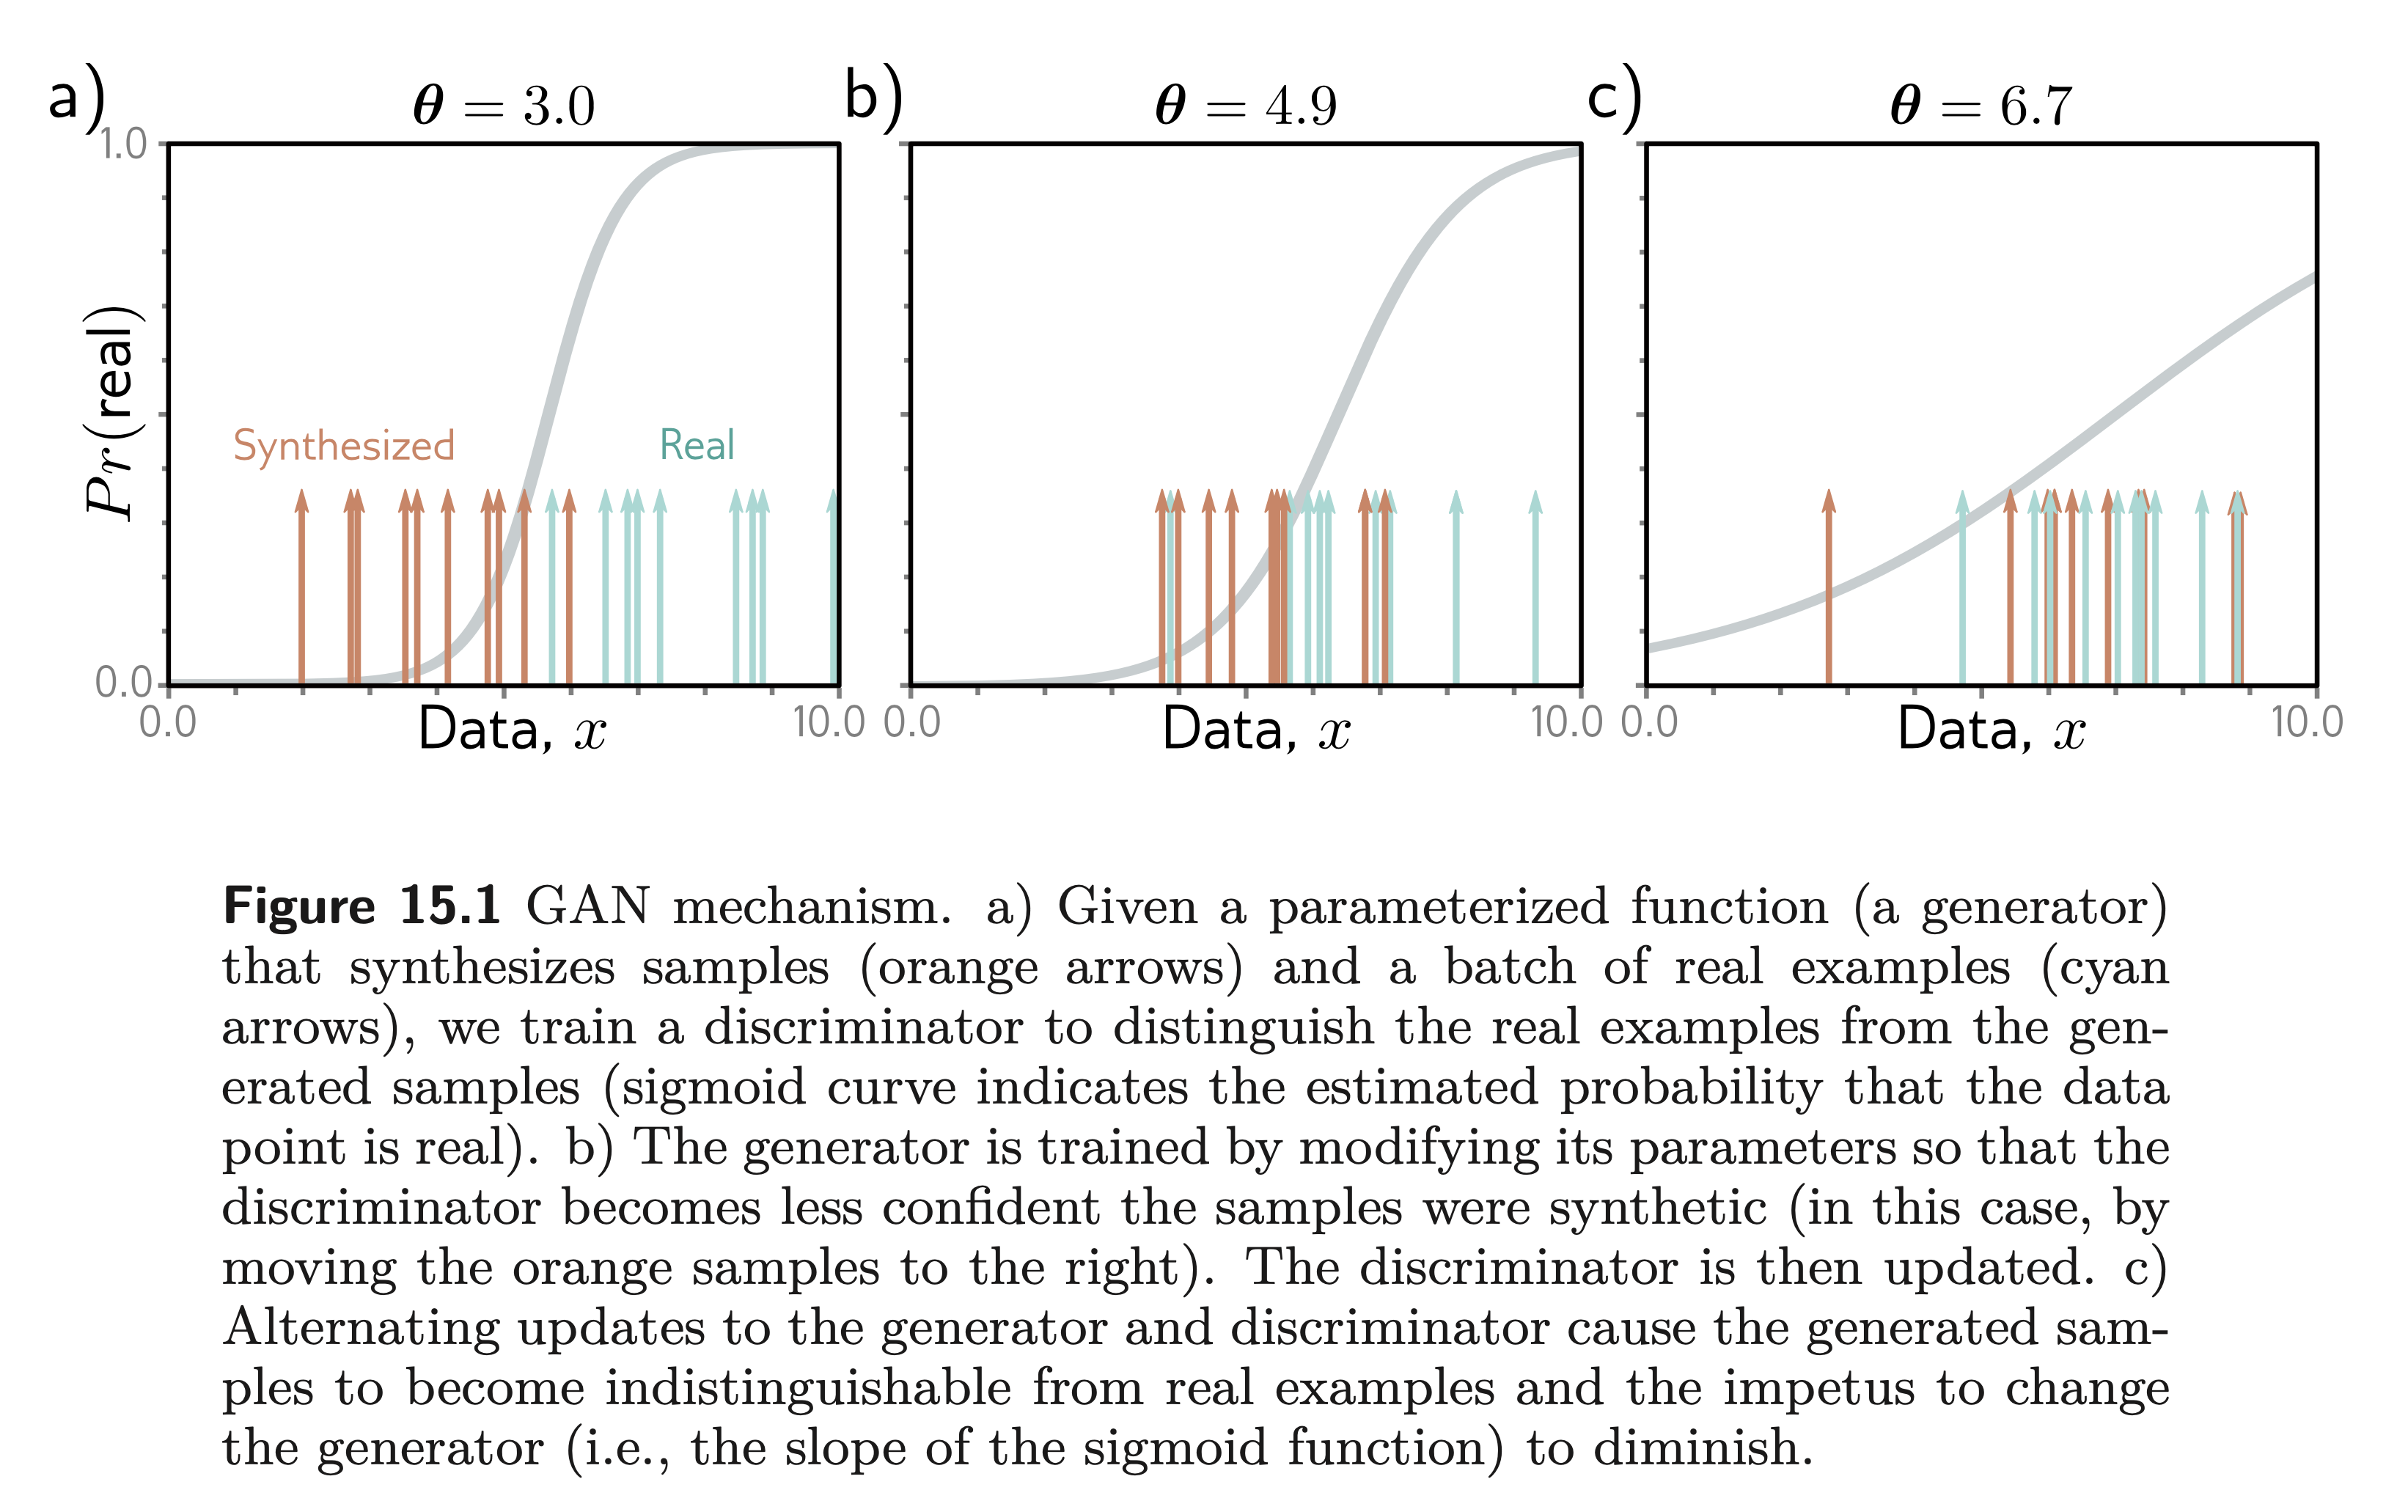

Work through the cells below, running each cell in turn. In various places you will see the words "TO DO". Follow the instructions at these places and make predictions about what is going to happen or write code to complete the functions.

Contact me at udlbookmail@gmail.com if you find any mistakes or have any suggestions.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap
from scipy.optimize import linprog

In [2]:
def print_matrix(matrix):
    # Obtém o número máximo de caracteres em cada coluna
    col_widths = [max(len(str(cell)) for cell in col) for col in zip(*matrix)]
    
    # Imprime a matriz
    for row in matrix:
        for cell, width in zip(row, col_widths):
            # Formata a célula para o comprimento da coluna
            print(f"{cell:{width}}", end=" ")
        print()  # Adiciona uma nova linha após cada linha da matriz


## I changed the name of distributions to dist1 and dist2, instead of p and q. Using p caused a lot of confusion because right below p is the flatten of the transport matrix P.

In [3]:
# Define two probability distributions

dist1 = np.array([5, 3, 2, 1, 8, 7, 5, 9, 2, 1]) #formerly p 
dist2 = np.array([4, 10,1, 1, 4, 6, 3, 2, 0, 1]) #formerly q
dist1 = dist1/np.sum(dist1);
dist2 = dist2/np.sum(dist2);

print("dist1=",dist1,"\n")
print("dist2=",dist2,"\n")

dist1= [0.11627907 0.06976744 0.04651163 0.02325581 0.18604651 0.1627907
 0.11627907 0.20930233 0.04651163 0.02325581] 

dist2= [0.125   0.3125  0.03125 0.03125 0.125   0.1875  0.09375 0.0625  0.
 0.03125] 



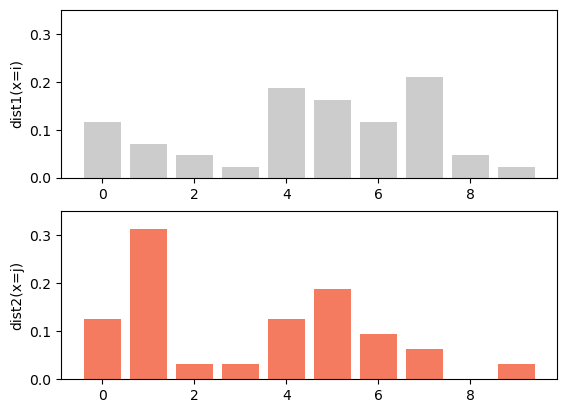

In [4]:
# Draw those distributions
fig, ax =plt.subplots(2,1);
x = np.arange(0,dist1.size,1)
ax[0].bar(x,dist1, color="#cccccc")
ax[0].set_ylim([0,0.35])
ax[0].set_ylabel("dist1(x=i)")


ax[1].bar(x,dist2,color="#f47a60")
ax[1].set_ylim([0,0.35])
ax[1].set_ylabel("dist2(x=j)")
plt.show()

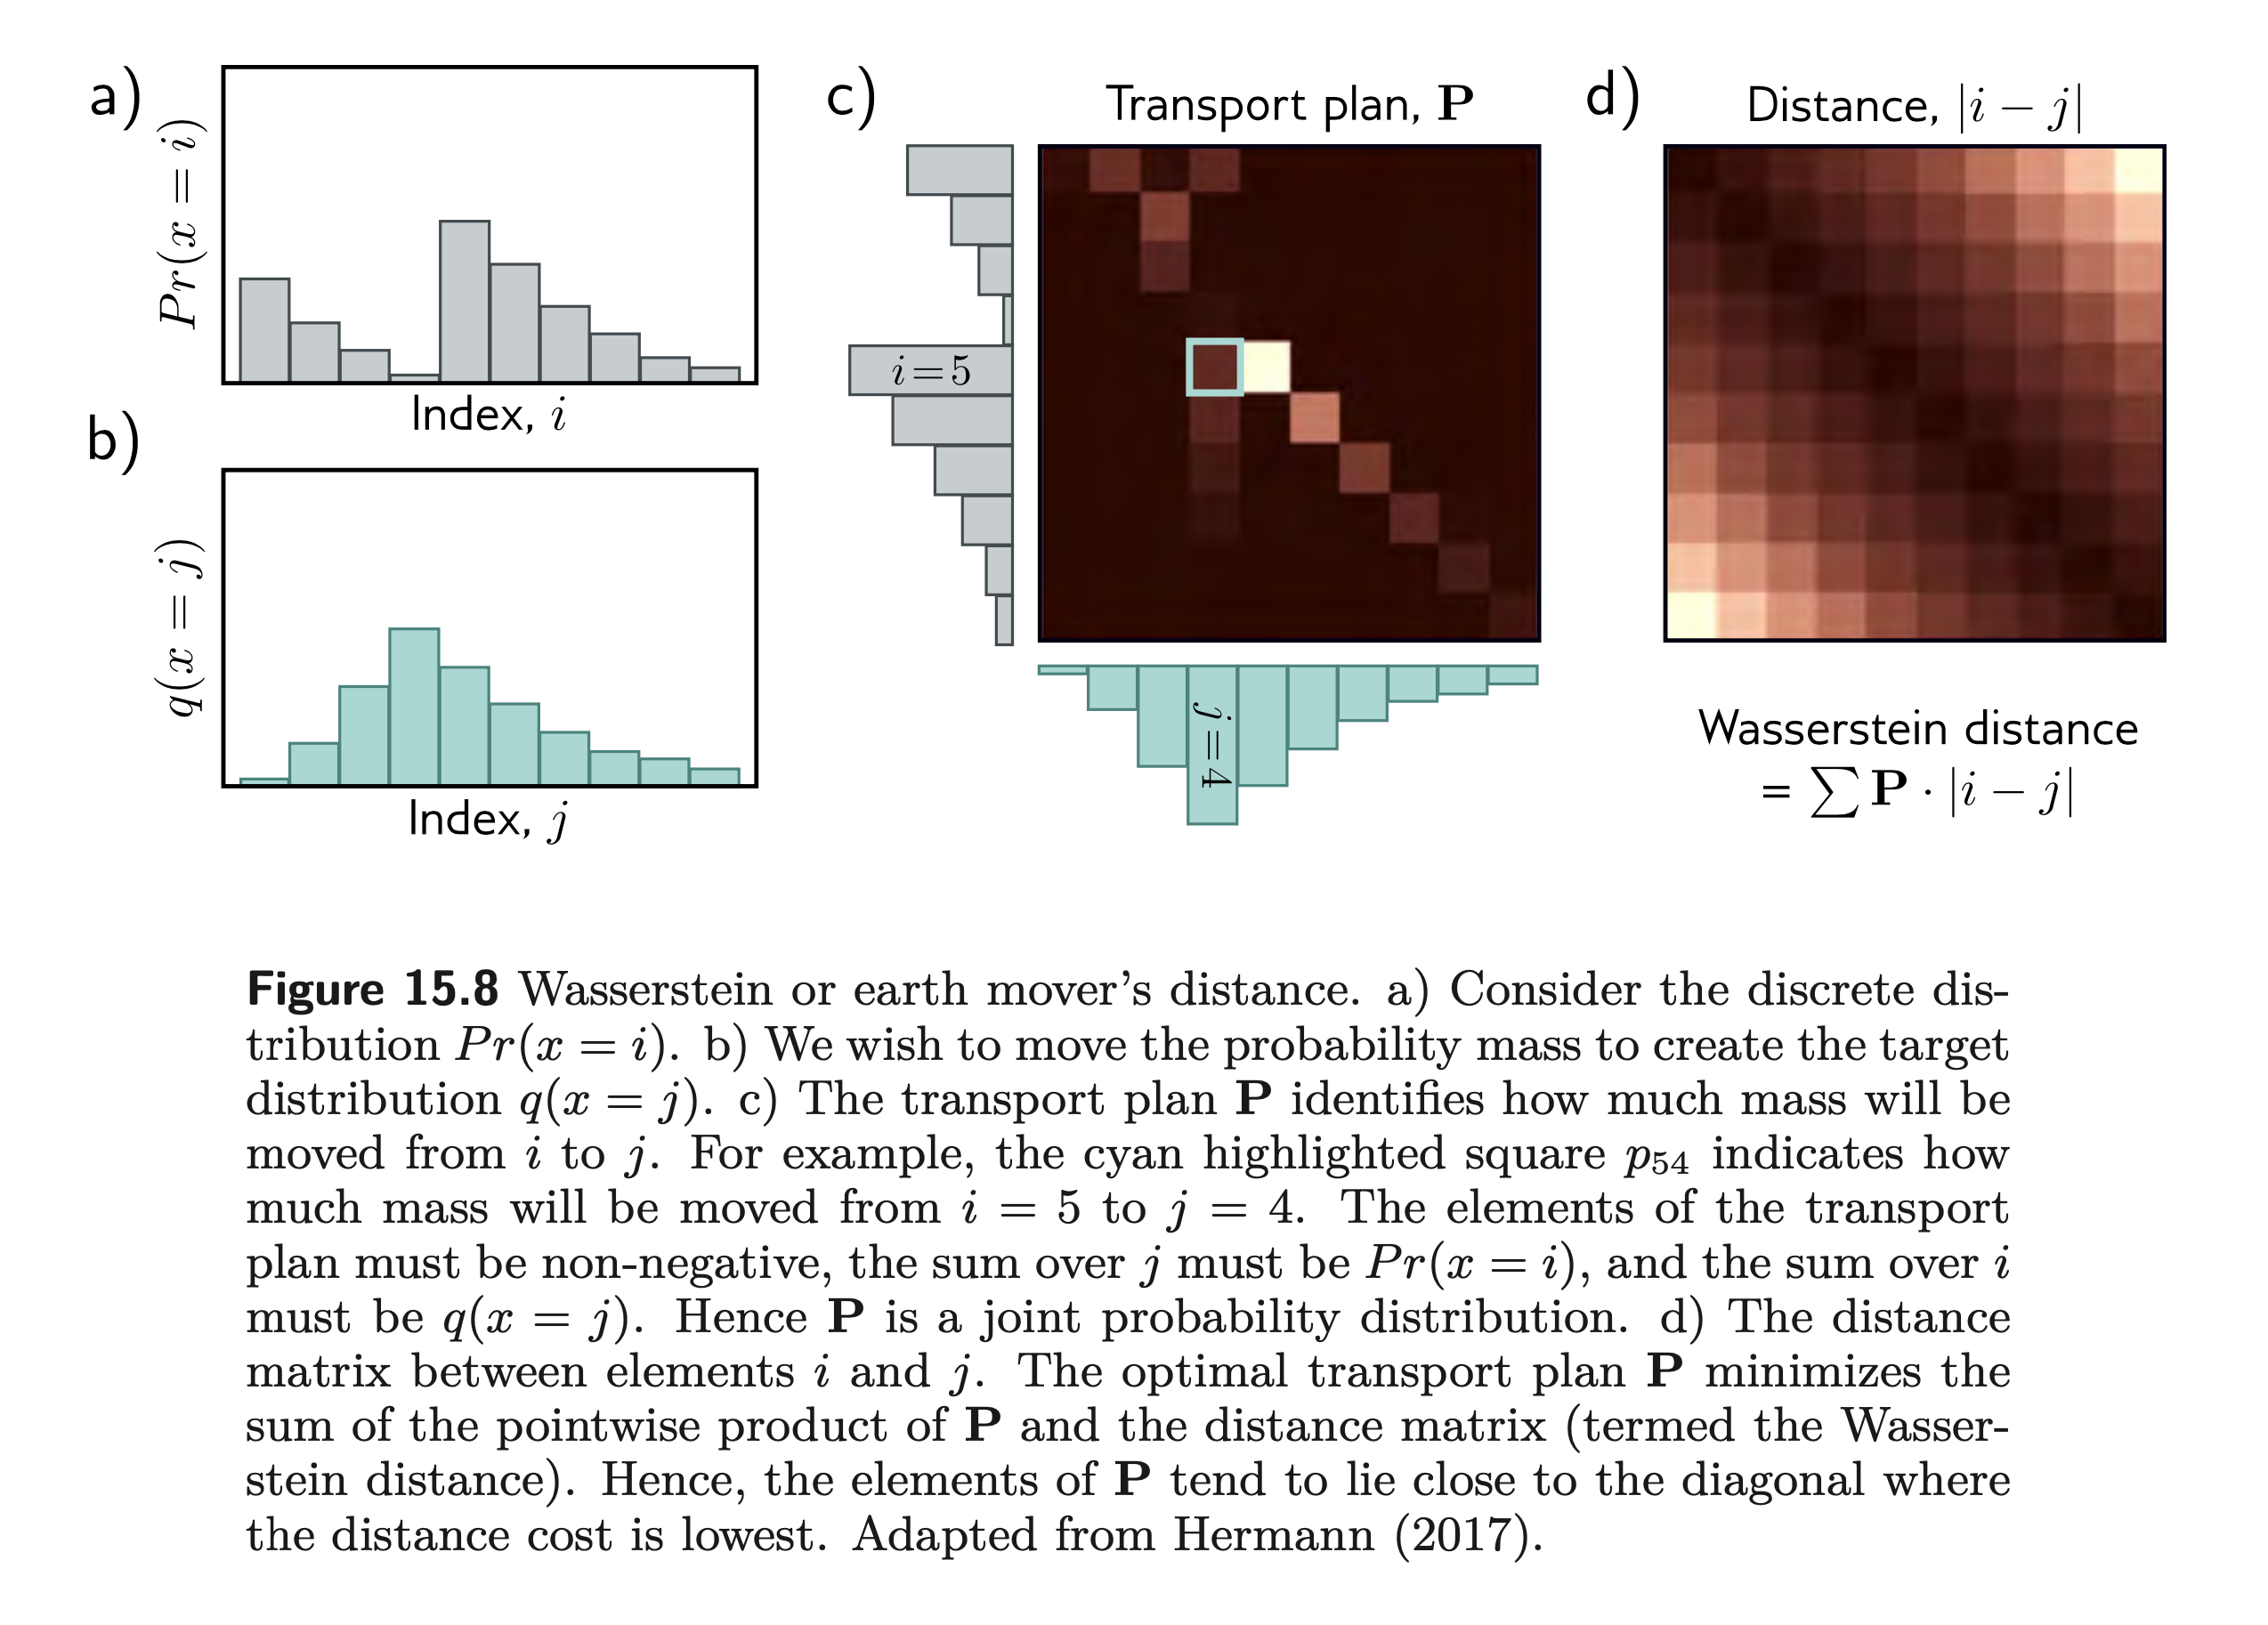

In [5]:
# TODO Define the distance matrix from figure 15.8d
# Replace this line
dist_mat = np.zeros((10,10))

for i in range(10):
    for j in range(10):
        dist_mat[i,j] = np.abs(i-j)

# vectorize the distance matrix
c = dist_mat.flatten()

print("dist_mat=",dist_mat,"\n")
print("c=",c,"\n")

dist_mat= [[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
 [1. 0. 1. 2. 3. 4. 5. 6. 7. 8.]
 [2. 1. 0. 1. 2. 3. 4. 5. 6. 7.]
 [3. 2. 1. 0. 1. 2. 3. 4. 5. 6.]
 [4. 3. 2. 1. 0. 1. 2. 3. 4. 5.]
 [5. 4. 3. 2. 1. 0. 1. 2. 3. 4.]
 [6. 5. 4. 3. 2. 1. 0. 1. 2. 3.]
 [7. 6. 5. 4. 3. 2. 1. 0. 1. 2.]
 [8. 7. 6. 5. 4. 3. 2. 1. 0. 1.]
 [9. 8. 7. 6. 5. 4. 3. 2. 1. 0.]] 

c= [0. 1. 2. 3. 4. 5. 6. 7. 8. 9. 1. 0. 1. 2. 3. 4. 5. 6. 7. 8. 2. 1. 0. 1.
 2. 3. 4. 5. 6. 7. 3. 2. 1. 0. 1. 2. 3. 4. 5. 6. 4. 3. 2. 1. 0. 1. 2. 3.
 4. 5. 5. 4. 3. 2. 1. 0. 1. 2. 3. 4. 6. 5. 4. 3. 2. 1. 0. 1. 2. 3. 7. 6.
 5. 4. 3. 2. 1. 0. 1. 2. 8. 7. 6. 5. 4. 3. 2. 1. 0. 1. 9. 8. 7. 6. 5. 4.
 3. 2. 1. 0.] 



In [6]:
# Define pretty colormap
my_colormap_vals_hex =('2a0902', '2b0a03', '2c0b04', '2d0c05', '2e0c06', '2f0d07', '300d08', '310e09', '320f0a', '330f0b', '34100b', '35110c', '36110d', '37120e', '38120f', '39130f', '3a1410', '3b1411', '3c1511', '3d1612', '3e1613', '3f1713', '401714', '411814', '421915', '431915', '451a16', '461b16', '471b17', '481c17', '491d18', '4a1d18', '4b1e19', '4c1f19', '4d1f1a', '4e201b', '50211b', '51211c', '52221c', '53231d', '54231d', '55241e', '56251e', '57261f', '58261f', '592720', '5b2821', '5c2821', '5d2922', '5e2a22', '5f2b23', '602b23', '612c24', '622d25', '632e25', '652e26', '662f26', '673027', '683027', '693128', '6a3229', '6b3329', '6c342a', '6d342a', '6f352b', '70362c', '71372c', '72372d', '73382e', '74392e', '753a2f', '763a2f', '773b30', '783c31', '7a3d31', '7b3e32', '7c3e33', '7d3f33', '7e4034', '7f4134', '804235', '814236', '824336', '834437', '854538', '864638', '874739', '88473a', '89483a', '8a493b', '8b4a3c', '8c4b3c', '8d4c3d', '8e4c3e', '8f4d3f', '904e3f', '924f40', '935041', '945141', '955242', '965343', '975343', '985444', '995545', '9a5646', '9b5746', '9c5847', '9d5948', '9e5a49', '9f5a49', 'a05b4a', 'a15c4b', 'a35d4b', 'a45e4c', 'a55f4d', 'a6604e', 'a7614e', 'a8624f', 'a96350', 'aa6451', 'ab6552', 'ac6552', 'ad6653', 'ae6754', 'af6855', 'b06955', 'b16a56', 'b26b57', 'b36c58', 'b46d59', 'b56e59', 'b66f5a', 'b7705b', 'b8715c', 'b9725d', 'ba735d', 'bb745e', 'bc755f', 'bd7660', 'be7761', 'bf7862', 'c07962', 'c17a63', 'c27b64', 'c27c65', 'c37d66', 'c47e67', 'c57f68', 'c68068', 'c78169', 'c8826a', 'c9836b', 'ca846c', 'cb856d', 'cc866e', 'cd876f', 'ce886f', 'ce8970', 'cf8a71', 'd08b72', 'd18c73', 'd28d74', 'd38e75', 'd48f76', 'd59077', 'd59178', 'd69279', 'd7937a', 'd8957b', 'd9967b', 'da977c', 'da987d', 'db997e', 'dc9a7f', 'dd9b80', 'de9c81', 'de9d82', 'df9e83', 'e09f84', 'e1a185', 'e2a286', 'e2a387', 'e3a488', 'e4a589', 'e5a68a', 'e5a78b', 'e6a88c', 'e7aa8d', 'e7ab8e', 'e8ac8f', 'e9ad90', 'eaae91', 'eaaf92', 'ebb093', 'ecb295', 'ecb396', 'edb497', 'eeb598', 'eeb699', 'efb79a', 'efb99b', 'f0ba9c', 'f1bb9d', 'f1bc9e', 'f2bd9f', 'f2bfa1', 'f3c0a2', 'f3c1a3', 'f4c2a4', 'f5c3a5', 'f5c5a6', 'f6c6a7', 'f6c7a8', 'f7c8aa', 'f7c9ab', 'f8cbac', 'f8ccad', 'f8cdae', 'f9ceb0', 'f9d0b1', 'fad1b2', 'fad2b3', 'fbd3b4', 'fbd5b6', 'fbd6b7', 'fcd7b8', 'fcd8b9', 'fcdaba', 'fddbbc', 'fddcbd', 'fddebe', 'fddfbf', 'fee0c1', 'fee1c2', 'fee3c3', 'fee4c5', 'ffe5c6', 'ffe7c7', 'ffe8c9', 'ffe9ca', 'ffebcb', 'ffeccd', 'ffedce', 'ffefcf', 'fff0d1', 'fff2d2', 'fff3d3', 'fff4d5', 'fff6d6', 'fff7d8', 'fff8d9', 'fffada', 'fffbdc', 'fffcdd', 'fffedf', 'ffffe0')
my_colormap_vals_dec = np.array([int(element,base=16) for element in my_colormap_vals_hex])
r = np.floor(my_colormap_vals_dec/(256*256))
g = np.floor((my_colormap_vals_dec - r *256 *256)/256)
b = np.floor(my_colormap_vals_dec - r * 256 *256 - g * 256)
my_colormap = ListedColormap(np.vstack((r,g,b)).transpose()/255.0)

def draw_2D_heatmap(data, title, my_colormap):
  # Make grid of intercept/slope values to plot
  xv, yv = np.meshgrid(np.linspace(0, 1, 10), np.linspace(0, 1, 10))
  fig,ax = plt.subplots()
  fig.set_size_inches(4,4)
  plt.imshow(data, cmap=my_colormap)
  ax.set_title(title)
  ax.set_xlabel('$q$'); ax.set_ylabel('$p$')
  plt.show()

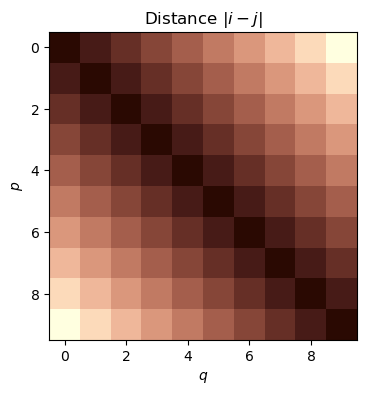

In [7]:
draw_2D_heatmap(dist_mat,'Distance $|i-j|$', my_colormap)

In [8]:
# Define b to be the vertical concatenation of p and q
b = np.hstack((dist1, dist2))[np.newaxis].transpose() # b (20 x 1)
print("b=",b,"\n")

b= [[0.11627907]
 [0.06976744]
 [0.04651163]
 [0.02325581]
 [0.18604651]
 [0.1627907 ]
 [0.11627907]
 [0.20930233]
 [0.04651163]
 [0.02325581]
 [0.125     ]
 [0.3125    ]
 [0.03125   ]
 [0.03125   ]
 [0.125     ]
 [0.1875    ]
 [0.09375   ]
 [0.0625    ]
 [0.        ]
 [0.03125   ]] 



In [9]:
# TODO:  Now construct the matrix A that has the initial distribution constraints
# so that Ap=b where p is the transport plan P vectorized rows first so p = np.flatten(P)
# Replace this line:
A = np.zeros((20,100)) 

# calculate the joint probability distribution which is the transport plan P
P = np.zeros((10,10))
for i in range(10):
    for j in range(10):
        P[i,j] = dist1[i] * dist2[j]
        
p = P.flatten()
print("p=",p,"\n")




p= [0.01453488 0.03633721 0.00363372 0.00363372 0.01453488 0.02180233
 0.01090116 0.00726744 0.         0.00363372 0.00872093 0.02180233
 0.00218023 0.00218023 0.00872093 0.0130814  0.0065407  0.00436047
 0.         0.00218023 0.00581395 0.01453488 0.00145349 0.00145349
 0.00581395 0.00872093 0.00436047 0.00290698 0.         0.00145349
 0.00290698 0.00726744 0.00072674 0.00072674 0.00290698 0.00436047
 0.00218023 0.00145349 0.         0.00072674 0.02325581 0.05813953
 0.00581395 0.00581395 0.02325581 0.03488372 0.01744186 0.01162791
 0.         0.00581395 0.02034884 0.05087209 0.00508721 0.00508721
 0.02034884 0.03052326 0.01526163 0.01017442 0.         0.00508721
 0.01453488 0.03633721 0.00363372 0.00363372 0.01453488 0.02180233
 0.01090116 0.00726744 0.         0.00363372 0.02616279 0.06540698
 0.0065407  0.0065407  0.02616279 0.03924419 0.01962209 0.0130814
 0.         0.0065407  0.00581395 0.01453488 0.00145349 0.00145349
 0.00581395 0.00872093 0.00436047 0.00290698 0.         0.00

(insert from excel)

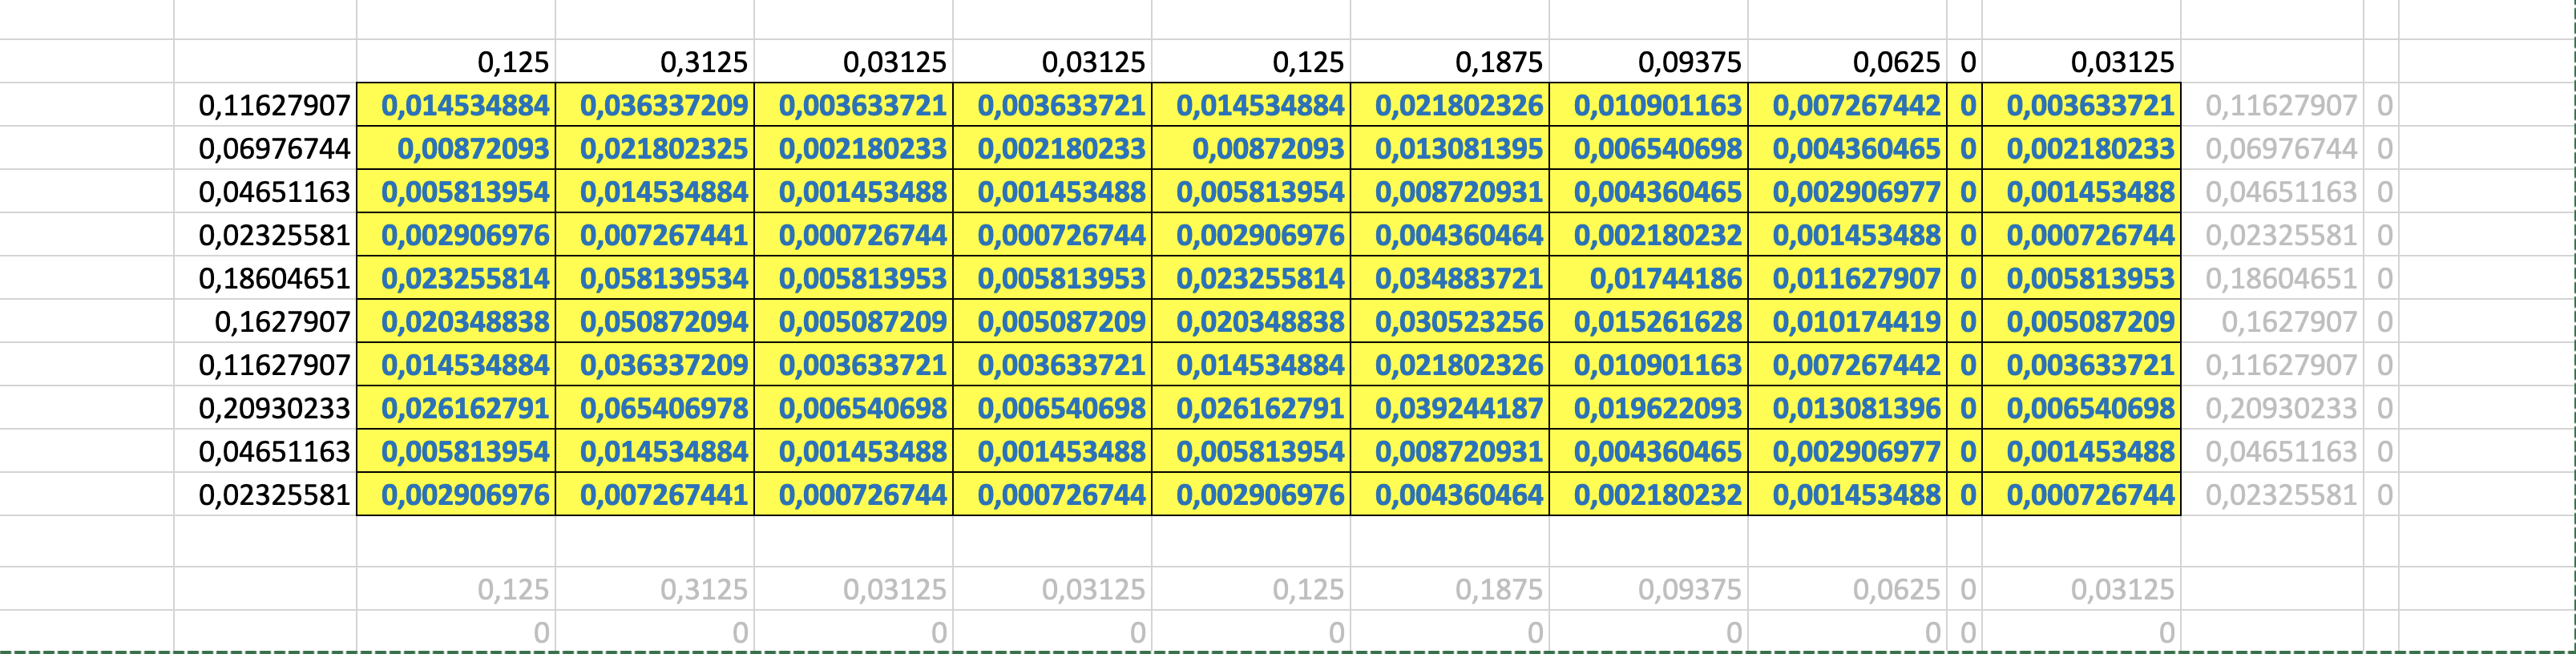

In [10]:
n = len(dist1)
m = len(dist2)
for i in range(n):
        for j in range(m):
            A[i, i * m + j] = 1
            A[n + j, i * m + j] = 1
            
print_matrix(A)  
        


1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.

(insert from excel)

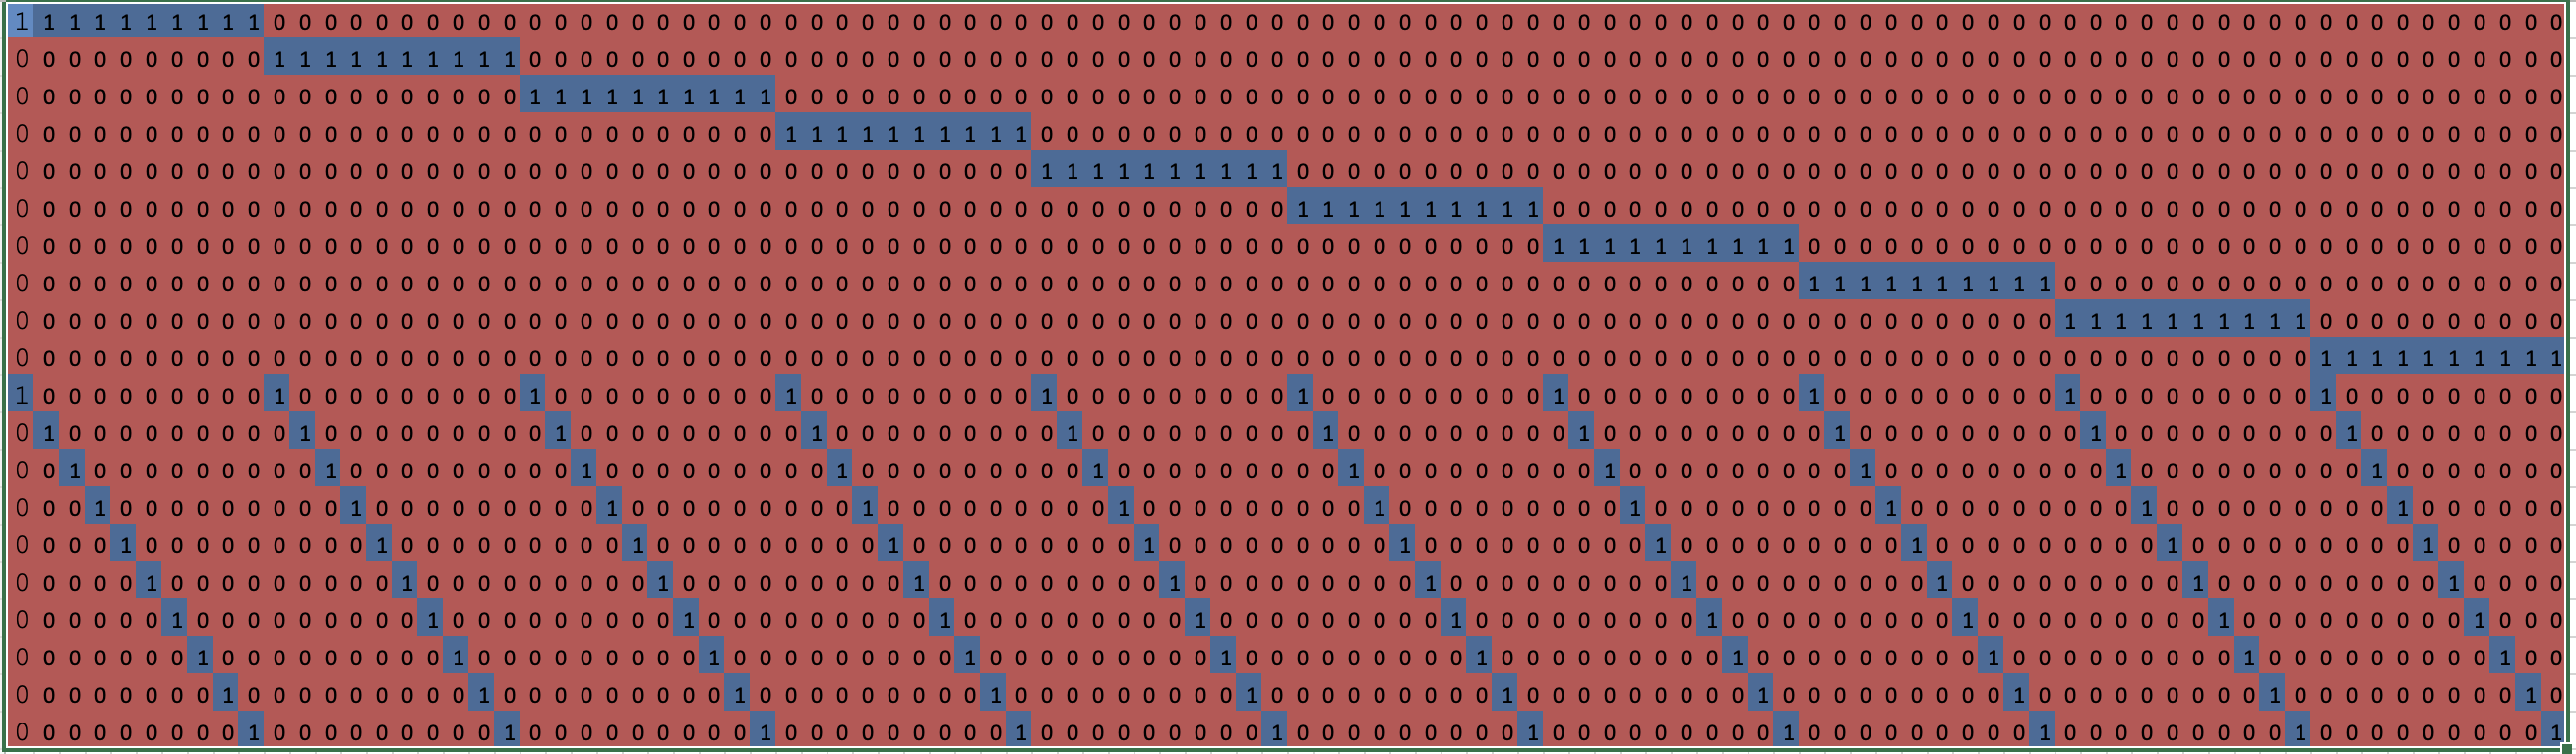

Now we have all of the things we need.  The vectorized distance matrix $\mathbf{c}$,  the constraint matrix $\mathbf{A}$, the vectorized and concatenated original distribution $\mathbf{b}$.  We can run the linear programming optimization.

In [11]:
# We don't need the constraint that p>0 as this is the default
opt = linprog(c, A_eq=A, b_eq=b)
print(opt)

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: 1.3633720930232558
              x: [ 1.163e-01  0.000e+00 ...  0.000e+00  2.326e-02]
            nit: 27
          lower:  residual: [ 1.163e-01  0.000e+00 ...  0.000e+00
                              2.326e-02]
                 marginals: [ 0.000e+00  2.000e+00 ...  2.000e+00
                              0.000e+00]
          upper:  residual: [       inf        inf ...        inf
                                    inf]
                 marginals: [ 0.000e+00  0.000e+00 ...  0.000e+00
                              0.000e+00]
          eqlin:  residual: [ 0.000e+00  0.000e+00 ...  0.000e+00
                             -4.163e-17]
                 marginals: [-7.000e+00 -6.000e+00 ... -1.000e+00
                             -0.000e+00]
        ineqlin:  residual: []
                 marginals: []
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip

Extract the answer and display

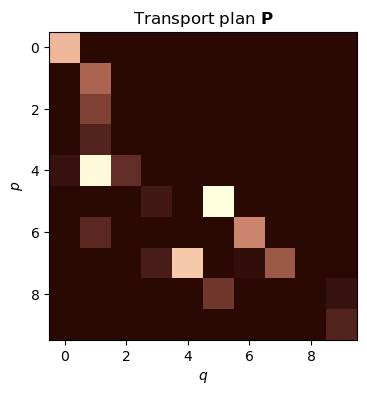

In [12]:
P = np.array(opt.x).reshape(10,10)
draw_2D_heatmap(P,'Transport plan $\mathbf{P}$', my_colormap)

Compute the Wasserstein distance


In [14]:
was = np.sum(P * dist_mat)
print("Wasserstein distance = ", was)

Wasserstein distance =  1.3633720930232556


TODO -- Compute the

*   Forward KL divergence $D_{KL}[p,q]$ between these distributions

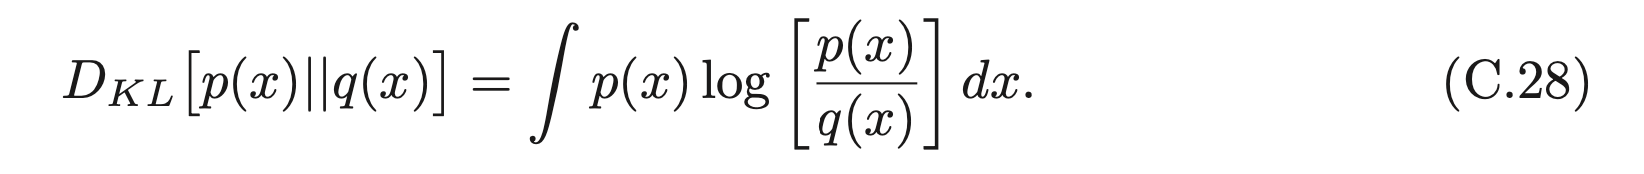

In [22]:
def forward_kl_divergence(d1, d2):
    return np.sum(d1 * np.log((d1 + 1e-10) / (d2 + 1e-10)))

*   Reverse KL divergence $D_{KL}[q,p]$ between these distributions    

    $D_{KL}[q(x),p(x)]$ = $\int q(x) log \frac{q(x)}{p(x)} dx$ 

In [23]:
def reverse_kl_divergence(d1, d2):
    return np.sum(d2 * np.log((d2 + 1e-10) / (d1 + 1e-10)))

*  Jensen-Shannon divergence $D_{JS}[p,q]$ between these distributions

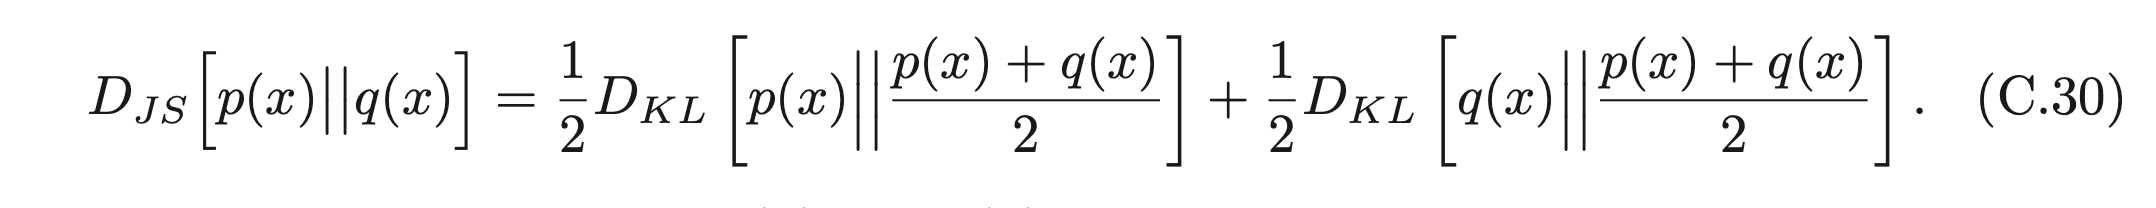

In [24]:
def jensen_shannon_divergence(d1, d2):
    m = 0.5 * (d1 + d2)
    return 0.5 * (forward_kl_divergence(d1, m) + forward_kl_divergence(d2, m))

In [25]:
forward_kl = forward_kl_divergence(dist1, dist2)
reverse_kl = reverse_kl_divergence(dist1, dist2)
jensen_shannon = jensen_shannon_divergence(dist1, dist2)

print("Forward KL Divergence:", forward_kl)
print("Reverse KL Divergence:", reverse_kl)
print("Jensen-Shannon Divergence:", jensen_shannon)

Forward KL Divergence: 1.1489933454451084
Reverse KL Divergence: 0.36471053109052715
Jensen-Shannon Divergence: 0.08417817455372616


What do you conclude?

$D_{JS} < Reverse D_{KL} < Forward D_{KL} < D_{was}$